In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers

import warnings 
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
folder=r"C:\prohar\cell_images\cell_images"

In [3]:
data=tf.keras.utils.image_dataset_from_directory(folder,image_size=(40,40),class_names=["Parasitized","Uninfected"],batch_size=200)

Found 27558 files belonging to 2 classes.


In [4]:
data_iterator=data.as_numpy_iterator()

In [5]:
batch=data_iterator.next()

In [6]:
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0])

In [7]:
len(batch)

2

In [8]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [9]:
data.as_numpy_iterator().next()[0].max()

0.918804

# splitting of our data 

In [10]:
len(data)

138

In [11]:
13*32

416

In [12]:
train_size=100
val_size=20
test_size=18


In [13]:
train_size,val_size,test_size

(100, 20, 18)

In [14]:
train=data.take(train_size)
test=data.skip(train_size).take(test_size)
val=data.skip(test_size+train_size).take(val_size)


# cnn model with 1 layer

In [15]:
input_shape=(40,40,3)

In [16]:
cnn_1_model=models.Sequential([
     layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation= 'sigmoid')
   
    
]
)

In [17]:
cnn_1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 128)               5914752   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [18]:
cnn_1_model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
history1 = cnn_1_model.fit(train,
         epochs= 10,
         validation_data= val)

Epoch 1/10
100/100 [==============================] - 53s 518ms/step - loss: 0.6423 - accuracy: 0.6342 - val_loss: 0.5668 - val_accuracy: 0.7203
Epoch 2/10
100/100 [==============================] - 86s 856ms/step - loss: 0.5390 - accuracy: 0.7309 - val_loss: 0.5076 - val_accuracy: 0.7484
Epoch 3/10
100/100 [==============================] - 54s 536ms/step - loss: 0.4498 - accuracy: 0.7875 - val_loss: 0.4325 - val_accuracy: 0.8057
Epoch 4/10
100/100 [==============================] - 50s 494ms/step - loss: 0.3419 - accuracy: 0.8514 - val_loss: 0.3428 - val_accuracy: 0.8583
Epoch 5/10
100/100 [==============================] - 51s 504ms/step - loss: 0.2482 - accuracy: 0.9014 - val_loss: 0.2845 - val_accuracy: 0.8909
Epoch 6/10
100/100 [==============================] - 51s 507ms/step - loss: 0.2000 - accuracy: 0.9242 - val_loss: 0.2953 - val_accuracy: 0.8924
Epoch 7/10
100/100 [==============================] - 51s 505ms/step - loss: 0.1591 - accuracy: 0.9388 - val_loss: 0.2692 - val_ac

In [20]:
cnn_1_model.evaluate(test)

18/18 [==============================] - 10s 145ms/step - loss: 0.2382 - accuracy: 0.9111


[0.23817263543605804, 0.9111111164093018]

In [21]:
EPOCHS=10

In [22]:
train_loss = history1.history['loss']
train_acc = history1.history['accuracy']

val_loss = history1.history['val_loss']
val_acc = history1.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

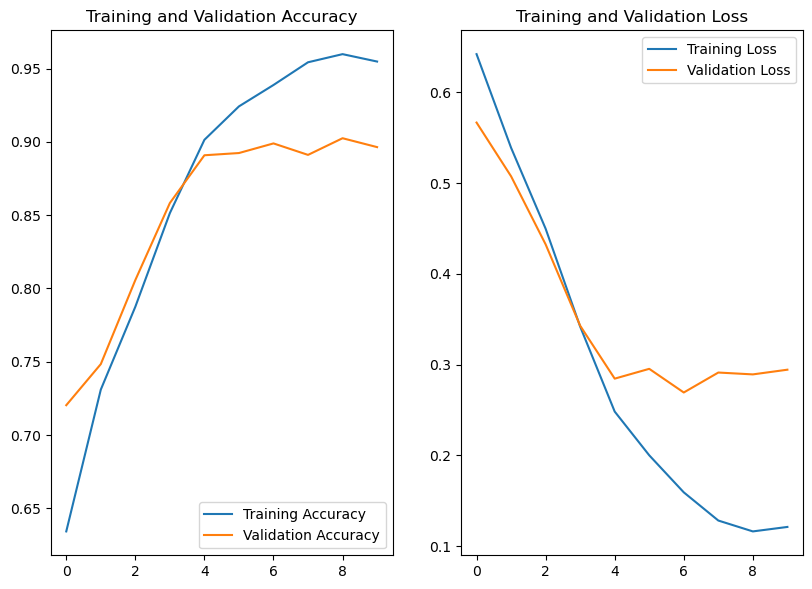

In [23]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# cnn with two layers

In [24]:
input_shape=(40,40,3)

In [25]:
cnn_2_model=models.Sequential([
     layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(256, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation= 'sigmoid')
   
    
]
)

In [26]:
cnn_2_model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [27]:
history = cnn_2_model.fit(train,
         epochs= 20,
         validation_data= val)

Epoch 1/20
100/100 [==============================] - 130s 1s/step - loss: 0.6062 - accuracy: 0.6639 - val_loss: 0.5368 - val_accuracy: 0.7193
Epoch 2/20
100/100 [==============================] - 128s 1s/step - loss: 0.3836 - accuracy: 0.8326 - val_loss: 0.2601 - val_accuracy: 0.8951
Epoch 3/20
100/100 [==============================] - 131s 1s/step - loss: 0.2249 - accuracy: 0.9133 - val_loss: 0.2029 - val_accuracy: 0.9252
Epoch 4/20
100/100 [==============================] - 129s 1s/step - loss: 0.1875 - accuracy: 0.9294 - val_loss: 0.1770 - val_accuracy: 0.9404
Epoch 5/20
100/100 [==============================] - 129s 1s/step - loss: 0.1590 - accuracy: 0.9425 - val_loss: 0.1634 - val_accuracy: 0.9507
Epoch 6/20
100/100 [==============================] - 129s 1s/step - loss: 0.1380 - accuracy: 0.9526 - val_loss: 0.1646 - val_accuracy: 0.9454
Epoch 7/20
100/100 [==============================] - 154s 2s/step - loss: 0.1265 - accuracy: 0.9582 - val_loss: 0.1614 - val_accuracy: 0.9485

In [28]:
cnn_2_model.evaluate(test)

18/18 [==============================] - 13s 352ms/step - loss: 0.2325 - accuracy: 0.9539


[0.23253142833709717, 0.9538888931274414]

In [29]:
EPOCHS=20

In [33]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

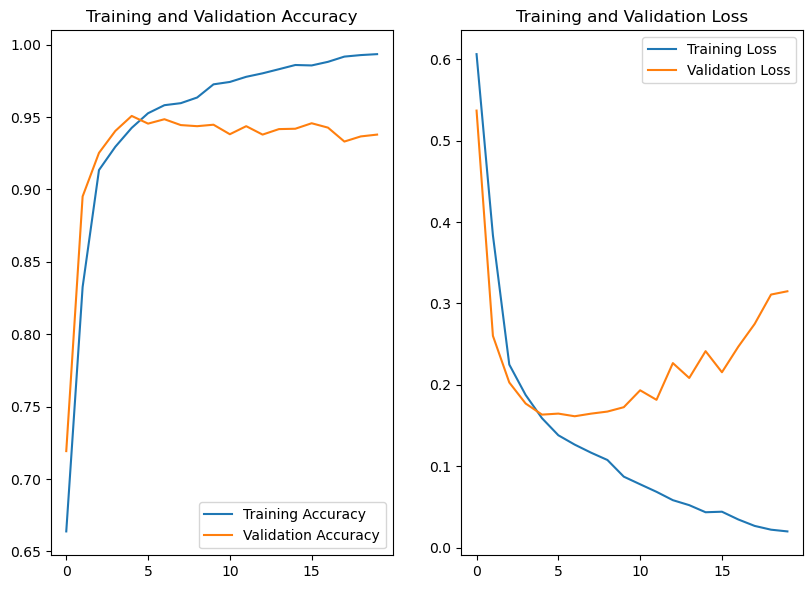

In [34]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# cnn model with three layers

In [35]:
input_shape=(40,40,3)

In [36]:
model = models.Sequential([
    layers.Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation= 'sigmoid')
    
])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 256)        

In [38]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [39]:
history = model.fit(train,
         epochs=10,
         validation_data=val)


Epoch 1/10
100/100 [==============================] - 217s 2s/step - loss: 0.6602 - accuracy: 0.5958 - val_loss: 0.5856 - val_accuracy: 0.7251
Epoch 2/10
100/100 [==============================] - 213s 2s/step - loss: 0.3243 - accuracy: 0.8608 - val_loss: 0.1961 - val_accuracy: 0.9353
Epoch 3/10
100/100 [==============================] - 224s 2s/step - loss: 0.1605 - accuracy: 0.9488 - val_loss: 0.1642 - val_accuracy: 0.9490
Epoch 4/10
100/100 [==============================] - 225s 2s/step - loss: 0.1397 - accuracy: 0.9539 - val_loss: 0.1472 - val_accuracy: 0.9533
Epoch 5/10
100/100 [==============================] - 215s 2s/step - loss: 0.1310 - accuracy: 0.9572 - val_loss: 0.1441 - val_accuracy: 0.9543
Epoch 6/10
100/100 [==============================] - 461s 5s/step - loss: 0.1167 - accuracy: 0.9609 - val_loss: 0.1264 - val_accuracy: 0.9593
Epoch 7/10
100/100 [==============================] - 311s 3s/step - loss: 0.1109 - accuracy: 0.9626 - val_loss: 0.1229 - val_accuracy: 0.9613

In [40]:
model.evaluate(test)

18/18 [==============================] - 19s 539ms/step - loss: 0.1208 - accuracy: 0.9619


[0.12075404822826385, 0.9619444608688354]

In [41]:
EPOCHS=10

In [42]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

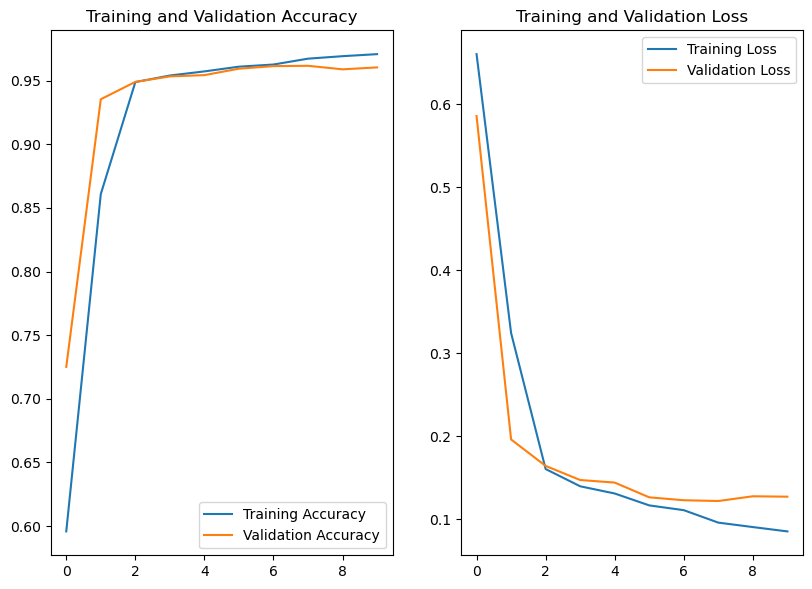

In [43]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [176]:
import cv2

In [177]:
def predict_malaria(img):
    image=cv2.imread(img)
    resize=tf.image.resize(image,(40,40))
    scale=np.expand_dims(resize/255,0)
    pred=model.predict(scale)
    return pred
    
    
    
    

In [178]:
x=predict_malaria(r"C:\prohar\cell_images\cell_images\Uninfected\C1_thinF_IMG_20150604_104919_cell_134.png")
print(x)

1/1 [==============================] - 0s 166ms/step
[[0.9951077]]


In [179]:
model.evaluate(test)

18/18 [==============================] - 91s 1s/step - loss: 0.1214 - accuracy: 0.9625


[0.12137190997600555, 0.9624999761581421]

In [60]:
model.save('malaria_mass.h5')

In [63]:
len(test)

18